### 1. 데이타 그룹 연산 - group by

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [ ]:
'''
통계자료에서 그룹 함수 가장 많이 사용한다.
그룹핑 시키는 방법
합, 평균, 최대, 최소...총합 기능이 다 제공된다.
사용자 정의 함수 만들고 가져다 쓰는 방법도 소개
'''

In [3]:
df = DataFrame({
    'Gender':['Female','Male','Female','Male','Female','Male','Female','Female'],
    'Smoking':['Smoker','Smoker','Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Non-Smoker','Smoker'],
    'CountA':np.random.randint(1,10,8),
    'CountB':np.random.randint(1,10,8)
})
df

,Gender,Smoking,CountA,CountB
0,Female,Smoker,7,1
1,Male,Smoker,1,4
2,Female,Smoker,3,1
3,Male,Non-Smoker,2,4
4,Female,Non-Smoker,5,6
5,Male,Non-Smoker,4,3
6,Female,Non-Smoker,1,6
7,Female,Smoker,5,5


In [4]:
# 1.
# groupby()로 데이타를 세분화(그룹핑)하면 DataFrameGroupBy 객체가 리턴
# 이 객체만으로는 아무짓도 못한다.
# 1. 객체를 리턴받고 | 2. 통계함수를 적용
df.groupby('Gender')

In [5]:
# 2. Smoking은 Numeric컬럼이 아니라서 sum() 통계함수의 적용을 받지 못한다.
df.groupby('Gender').sum()

,CountA,CountB
Gender,,
Female,21,19
Male,7,11


In [6]:
df.groupby('Gender').max()

,Smoking,CountA,CountB
Gender,,,
Female,Smoker,7,6
Male,Smoker,4,4


In [8]:
df.groupby(['Gender','Smoking']).sum()

CountA  CountB
Gender Smoking                   
Female Non-Smoker       6      12
       Smoker          15       7
Male   Non-Smoker       6       7
       Smoker           1       4

In [11]:
# df.groupby('Gender')['CountA']
# 특정한 컬럼에 한해서만 그룹핑..시리즈 반환
df.groupby('Gender')['CountA'].sum()
df.groupby('Gender')['CountA'].agg('sum') #위와 동일한 결과

Gender
Female    21
Male       7
Name: CountA, dtype: int32

In [15]:
df.groupby('Gender')[['CountA']].sum() #데이타 프레임으로 반환
df.groupby('Gender')[['CountA']].agg('sum')
# df.groupby('Gender')['CountA'].agg(['sum'])

,CountA
Gender,
Female,21
Male,7


#### aggregation

In [17]:
df.groupby('Gender')['CountA'].agg(['sum', 'mean','count'])

,sum,mean,count
Gender,,,
Female,21,4.200000,5
Male,7,2.333333,3


### 실전 데이타로 응용하기

In [18]:
tipdf=pd.read_csv('../data/tips.csv')
tipdf.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [19]:
#1. 날짜별로 그룹핑..count()
tipdf.groupby(['day']).count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [31]:
#문제 1.
#day라는 컬럼으로 세분화...1)요일별 팁의 평균을 확인..2)정렬..3)시각화로 마무리.
# 1)tipdf.groupby('day')[['tip']].mean()
tip_group=tipdf.groupby(by=['day'])
tip_group['tip'].mean()

# 2)
tip_group['tip'].mean().sort_values(ascending=False)

# 3)
tip_group['tip'].mean().plot(kind='bar', grid=True)
plt.show()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [34]:
# 문제 2.
# tipdf에서 성별로 먼저 그룹핑 하고, 나중에 다시 흡연여부로 그룹핑..mean()
# tipdf.groupby(['sex','smoker']).mean()
tip_group2 = tipdf.groupby(by=['sex','smoker'])
tip_group2.mean()

total_bill       tip      size
sex    smoker                                
Female No       18.105185  2.773519  2.592593
       Yes      17.977879  2.931515  2.242424
Male   No       19.791237  3.113402  2.711340
       Yes      22.284500  3.051167  2.500000

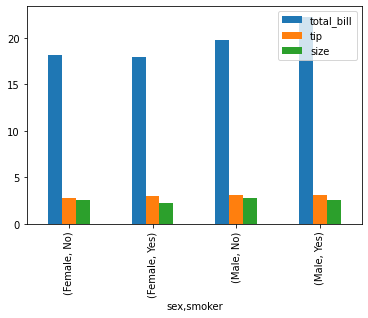

In [35]:
tip_group2.mean().plot(kind='bar')
plt.show()

### 알아두면 좋은 함수 , 속성들

In [40]:
#1. unique()
df['Gender'].unique()

#2. describe() -데이타에 대한 간력한 설명(간략한 통계자료)..데이타의 성격을 알고 싶을때
df.describe()

# 3.sum() 숫자데이타에만 적용
# 4. count()는 값의 갯수
# 5. value_counts()...해당 컬럼에서 그 값이 몇개 나왔는지를 알수 있다.
df['Smoking'].value_counts()

Non-Smoker    4
Smoker        4
Name: Smoking, dtype: int64

In [43]:
# 6. apply()
'''
판다스에서 내가 함수를 만들어서 적용할때 사용
판다스에서 제공하지 않는 함수를 내가 직접 만들어서 사용할수 있다.

'''

def add(x):
    return x+100

# df[['CountA']].apply(add) # sum() | agg('['sum','mean']')
df[['CountA']].agg(add)

,CountA
0,107
1,101
2,103
3,102
4,105
5,104
6,101
7,105
